In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [ ]:
data = pd.read_csv("/Users/shrutikunapuli/Downloads/web-traffic-time-series-forecasting/train_1.csv")

In [13]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Feature Extraction

In [14]:
for c in data.columns:
    if data[c].isna().sum()>101544:     
        print(c)

In [15]:
data = data.melt(id_vars='Page', var_name='Date', value_name='Visits')

In [16]:
import re
def split_page(page):
  w = re.split('_|\.', page)
  return ''.join(w[-2]),   w[-1]

li = list(data.Page.apply(split_page))
df = pd.DataFrame(li)
df.columns = ['Access','Agents']
df = pd.concat([data, df], axis = 1)

In [17]:
df

,Page,Date,Visits,Access,Agents
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,all-access,spider
...,...,...,...,...,...
5499995,Nyle_DiMarco_en.wikipedia.org_desktop_all-agents,2016-12-31,745.0,desktop,all-agents
5499996,O._J._Simpson_murder_case_en.wikipedia.org_des...,2016-12-31,1736.0,desktop,all-agents
5499997,OSI_model_en.wikipedia.org_desktop_all-agents,2016-12-31,1471.0,desktop,all-agents
5499998,OS_X_en.wikipedia.org_desktop_all-agents,2016-12-31,458.0,desktop,all-agents


In [18]:
name = []
for page in df['Page']:
    split = page.split('.')
    name.append(split[-3])

df['Name'] = name
df['Language'] = df['Name'].str[-2:]

In [20]:
df.head()

,Page,Date,Visits,Access,Agents,Name,Language
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,all-access,spider,2NE1_zh,zh
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,all-access,spider,2PM_zh,zh
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,all-access,spider,3C_zh,zh
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,all-access,spider,4minute_zh,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,all-access,spider,52_Hz_I_Love_You_zh,zh


In [21]:
df["Date"] = df['Date'].astype('datetime64[ns]')

In [22]:
df.head()

,Page,Date,Visits,Access,Agents,Name,Language
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,all-access,spider,2NE1_zh,zh
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,all-access,spider,2PM_zh,zh
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,all-access,spider,3C_zh,zh
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,all-access,spider,4minute_zh,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,all-access,spider,52_Hz_I_Love_You_zh,zh


In [23]:
df["Day"] = df.Date.dt.day

In [24]:
df["Month"] = df.Date.dt.month

In [25]:
df["Year"] = df.Date.dt.year  

In [26]:
df.head()

,Page,Date,Visits,Access,Agents,Name,Language,Day,Month,Year
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,all-access,spider,2NE1_zh,zh,1,7,2015
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,all-access,spider,2PM_zh,zh,1,7,2015
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,all-access,spider,3C_zh,zh,1,7,2015
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,all-access,spider,4minute_zh,zh,1,7,2015
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,all-access,spider,52_Hz_I_Love_You_zh,zh,1,7,2015


In [27]:
mean =pd.DataFrame( df.groupby(["Page"])["Visits"].mean())

In [28]:
median = pd.DataFrame(df.groupby(["Page"])["Visits"].median())

In [29]:
median.columns = ["Page_median"]
mean.columns = ["Page_mean"]

In [30]:
df_final = df.set_index('Page').join(mean).join(median)

In [31]:
df_final.head()

,Date,Visits,Access,Agents,Name,Language,Day,Month,Year,Page_mean,Page_median
Page,,,,,,,,,,,
!vote_en.wikipedia.org_desktop_all-agents,2015-07-01,3.0,desktop,all-agents,!vote_en,en,1,7,2015,3.277567,3.0
!vote_en.wikipedia.org_desktop_all-agents,2015-07-02,4.0,desktop,all-agents,!vote_en,en,2,7,2015,3.277567,3.0
!vote_en.wikipedia.org_desktop_all-agents,2015-07-03,7.0,desktop,all-agents,!vote_en,en,3,7,2015,3.277567,3.0
!vote_en.wikipedia.org_desktop_all-agents,2015-07-04,4.0,desktop,all-agents,!vote_en,en,4,7,2015,3.277567,3.0
!vote_en.wikipedia.org_desktop_all-agents,2015-07-05,4.0,desktop,all-agents,!vote_en,en,5,7,2015,3.277567,3.0


In [32]:
df_final.reset_index(level=0, inplace=True)

In [35]:
project = []
for i in range(df_final.shape[0]):
    project.append(df_final["Page"][i].split("_")[-3])

In [36]:
df_final["Project"]= project

In [ ]:
summap = {}
lang_list = ["en", "ja", "de", "fr", "zh", "ru", "es", "commons", "www"]
for l in lang_list:
  summap[l] = df[df.Language == l].iloc[:,:-4].sum(axis = 0)/df[df.Language == l].shape[0]

fig = plt.figure(figsize = (15, 7))
plt.xlabel('Days')
plt.ylabel('Views')
plt.title('Average Page View by Language')

for key in summap:
  plt.plot(days, summap[key], label = key)
plt.legend()
plt.show()

### EDA
Removing Null values

Understanding Data and features
 
### Modeling


In [13]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
import math

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import math

In [5]:
data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def plot_predictions(actual, predicted, figsize, title):
    
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [8]:
data.fillna(0, inplace=True)

In [9]:
data = data.reset_index()
data = data.drop(['Page',"index"],axis=1)

In [10]:
data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,12.0,13.0,3.0,5.0,10.0
145059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def AutoRegression(data, lags, test_days, visualize_prediction:bool=False):
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    
    train = scaled_data[:-test_days]
    test = scaled_data[-test_days:]
    
    ar = AutoReg(train, lags=lags)
    model = ar.fit()
    print(model.summary())
    

    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end)
    
    
    test_start = len(train)
    test_end = len(train) + len(test)
    test_pred = model.predict(start=test_start, end=test_end)
    
   
    train_inverse = scaler.inverse_transform(train_pred.reshape(-1, 1))
    test_inverse = scaler.inverse_transform(test_pred.reshape(-1, 1))
    

    if visualize_prediction:
        plot_predictions(train, train_pred, figsize=(20, 6), title='AR Trainig (In Fold) Predictions')
        plot_predictions(test, test_pred, figsize=(20, 6), title='AR Testing (Out of Fold) Predictions')
    

    tr = math.sqrt(((train_pred-train)**2).mean())
    ts = math.sqrt(((test_pred-test)**2).mean())
    
    print(f'Train Erro1r: {tr} | Test Error1: {ts}')
    
  

    
    print(f'Train Error: {train_error} | Test Error: {test_error}')

    return model

/Users/shrutikunapuli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  519
Model:                    AutoReg(30)   Log Likelihood                 681.650
Method:               Conditional MLE   S.D. of innovations              0.060
Date:                Fri, 10 Dec 2021   AIC                             -5.495
Time:                        15:10:57   BIC                             -5.221
Sample:                            30   HQIC                            -5.387
                                  519                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0216      0.006      3.439      0.001       0.009       0.034
y.L1           0.1968      0.045      4.357      0.000       0.108       0.285
y.L2           0.0937      0.046      2.036      0.0

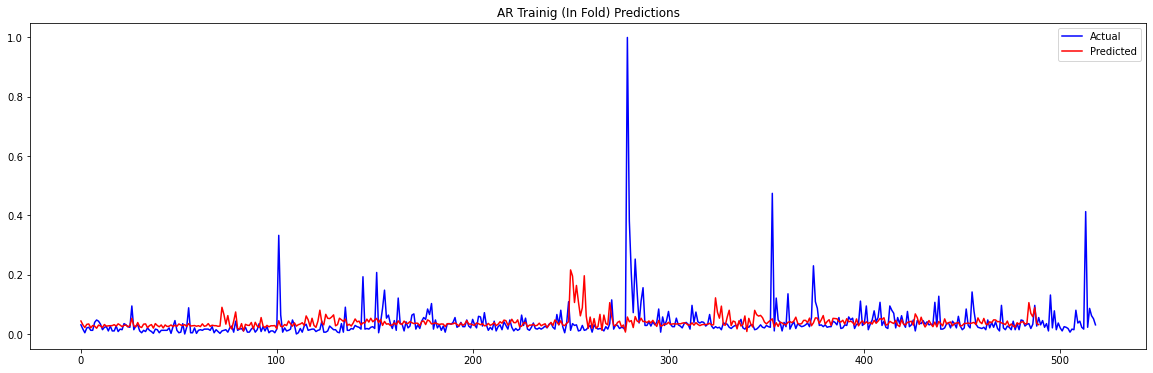

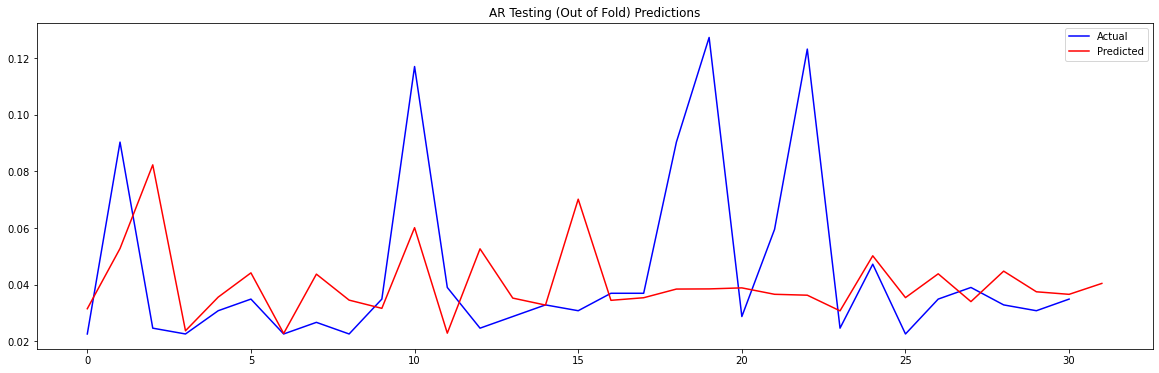

Train Erro1r: 0.0647438995074885 | Test Error1: 0.033048507742640135
Train Error: 31723.162069197206 | Test Error: 1367.1588631346135


In [28]:
train = data.iloc[0, :].values
model = AutoRegression(train, 30, 31, True)

In [30]:
def Arima(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    
    train = scaled_data[:-31]
    test = scaled_data[-31:]

    
    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()
    print(model.summary())
    model.plot_diagnostics(figsize=(15, 12))
    plt.show()
 
    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end, typ='levels')

  
    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')

 
    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))

    if visualize_predictions:
        plot_predictions(train, train_pred, (20, 5), 'ARIMA Training Predictions')
        plot_predictions(test, test_pred, (20, 5), 'ARIMA Testing Predictions')
  
    
    tr = math.sqrt(((train_pred-train)**2).mean())
    ts = math.sqrt(((test_pred-test)**2).mean())
    
    print(f'Train Error: {tr} | Test Error: {ts}')
    
    return model

In [31]:
row = data.iloc[0, :]

In [32]:
row

2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 0, Length: 550, dtype: float64

/Users/shrutikunapuli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/shrutikunapuli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/shrutikunapuli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/shrutikunapuli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  519
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 722.696
Date:                Fri, 10 Dec 2021   AIC                          -1423.393
Time:                        15:11:16   BIC                          -1376.643
Sample:                    07-01-2015   HQIC                         -1405.076
                         - 11-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3867      0.621     -2.233      0.026      -2.604      -0.170
ar.L2         -1.4572      0.696     -2.093      0.036      -2.822      -0.092
ar.L3         -1.0137      0.658     -1.540      0.1

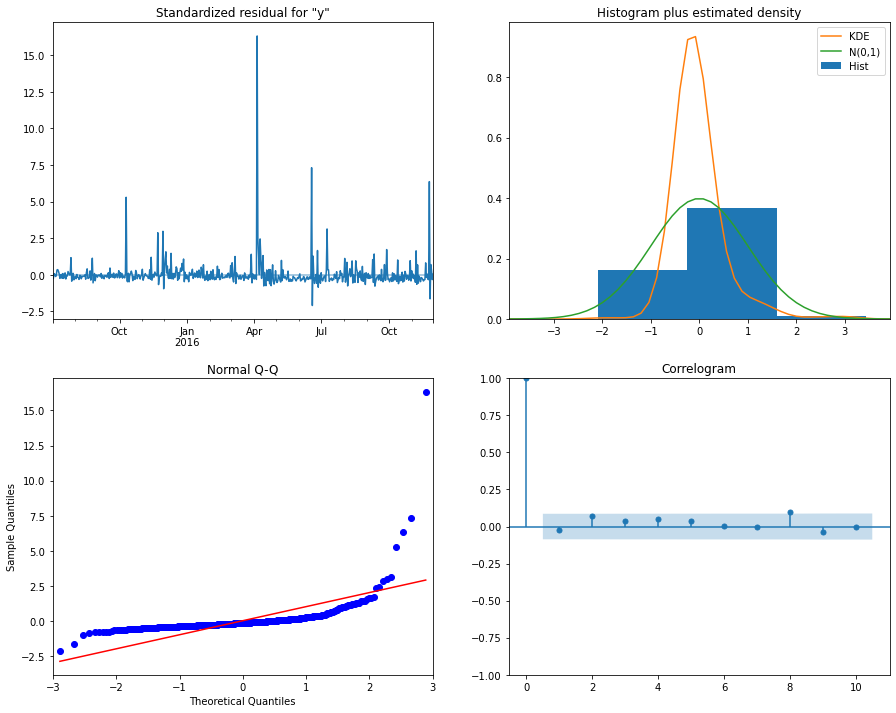

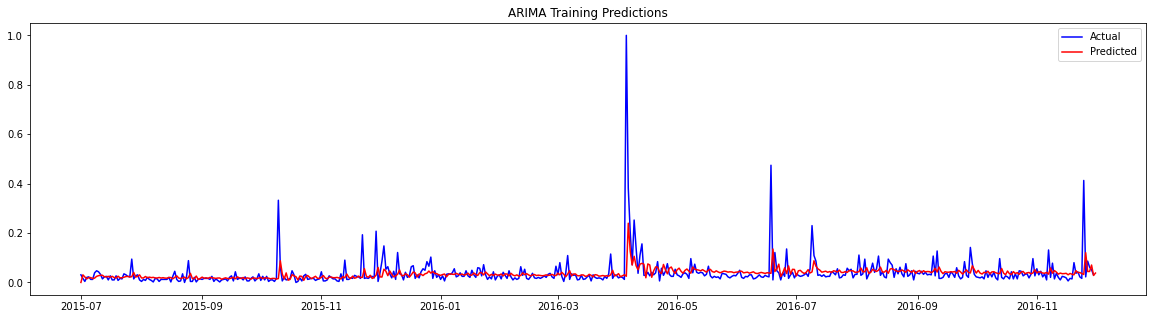

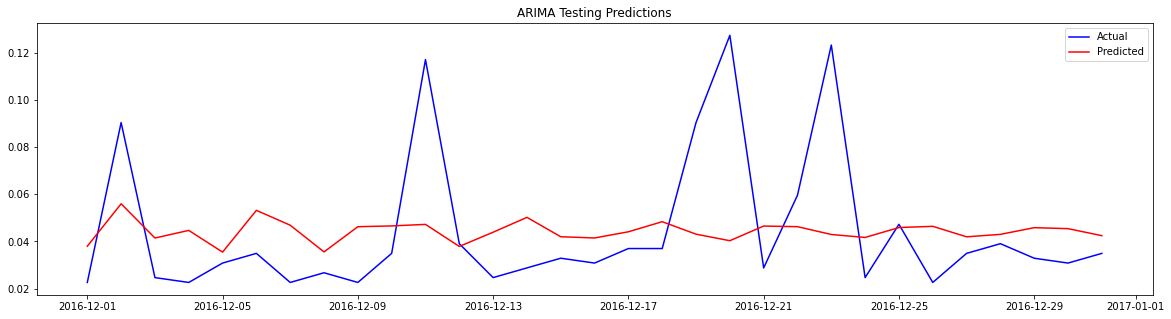

Train Error: 0.05974294868779617 | Test Error: 0.03010597314522639


In [33]:
model = Arima(row, 5, 1, 5, 31, visualize_predictions=True)